# **Neural Networks**

This is a practical guide to implementing a simple neural network in PyTorch for binary classification.

**Core Concept**
A neural network is a powerful function that can learn complex, non-linear relationships. For classification, it acts as a decision function. A single hidden layer is often enough to solve non-linearly separable problems that a simple linear model cannot.

**Model Architecture**
The standard structure is:
1.  **Hidden Layer:** A `Linear` layer (e.g., from 1 feature to 2 neurons) followed by a `Sigmoid` activation.
2.  **Output Layer:** A `Linear` layer (from 2 neurons to 1 output) followed by a `Sigmoid` to produce a probability.

**Implementation in PyTorch**
You can build this model in two ways:
*   Using `nn.Module`: Define a custom class that explicitly outlines the `forward` pass.
*   Using `nn.Sequential`: Stack the layers sequentially for a compact definition.

**Training Loop**
The training process follows these steps:
1.  Initialize the model, a loss function (e.g., `BCELoss`), and an optimizer (e.g., SGD).
2.  For each epoch:
    *   **Forward Pass:** Get the model's predictions.
    *   **Calculate Loss:** Compare predictions to the true labels.
    *   **Backward Pass:** Calculate gradients.
    *   **Update Weights:** The optimizer adjusts the model's parameters.

**Adapting for Regression**
To predict a continuous value instead of a category:
*   Remove the final `Sigmoid` activation.
*   Change the loss function to `MSELoss`.

---

In [2]:
# Import the libraries we need for this lab
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [3]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

### **Neural Network Module and Training Function**
Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice.

In [4]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [5]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [6]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

### **Define the Neural Network, Criterion Function, Optimizer and Train the Model**
Create the Cross-Entropy loss function:

In [7]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

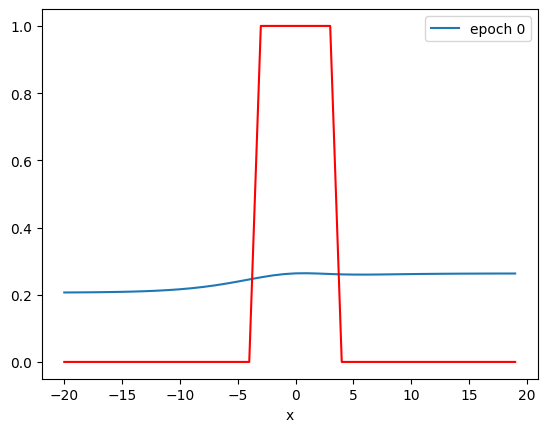

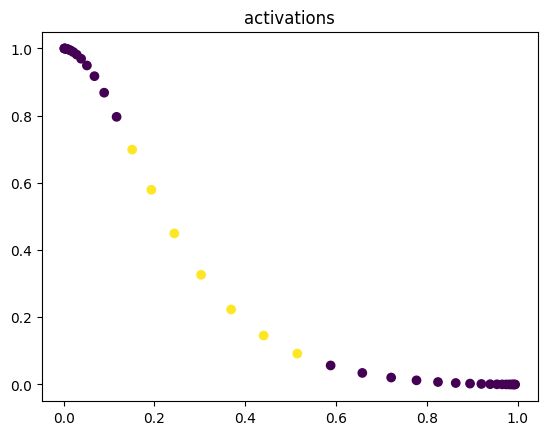

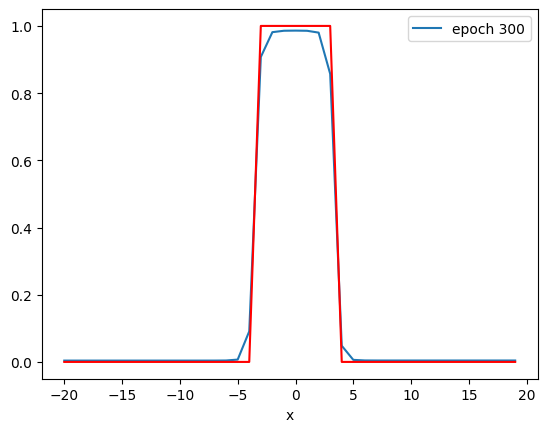

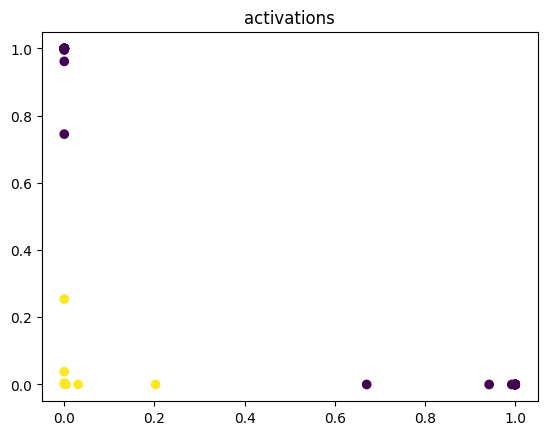

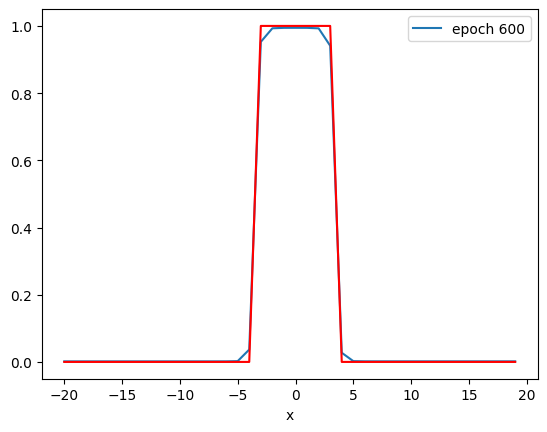

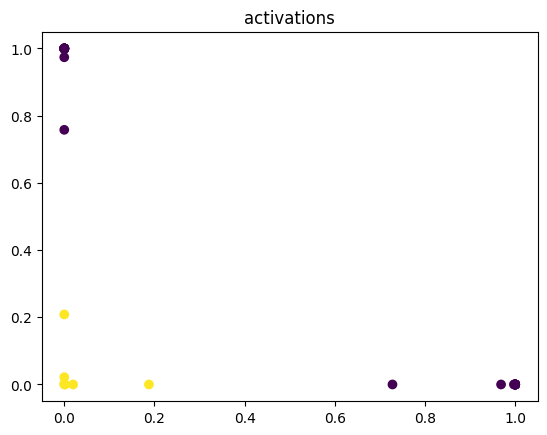

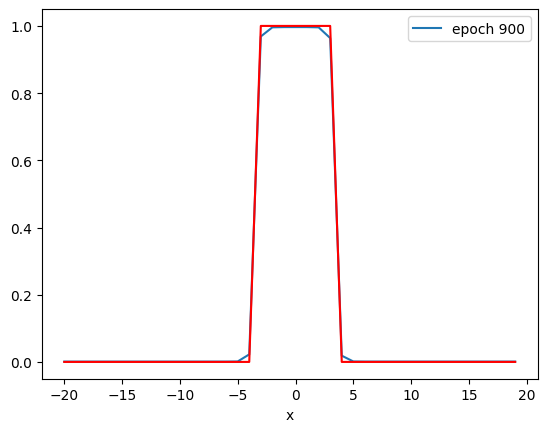

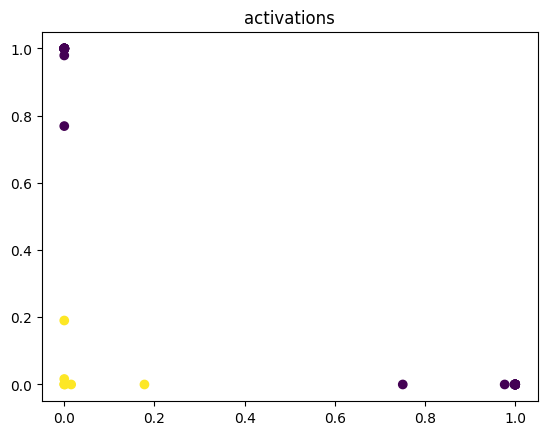

Text(0.5, 1.0, 'cross entropy loss')

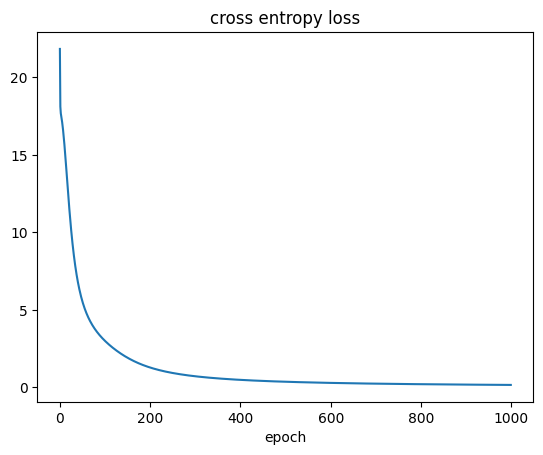

In [8]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [9]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9969], grad_fn=<SigmoidBackward0>)

In [10]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward0>)

In [11]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

---

### **Neural Network Flexibility: The Role of Hidden Layer Size**

#### **1. Central Idea: Flexibility through Hidden Neurons**
Increasing the number of neurons in the **hidden layer** directly enhances the model's **flexibility**. This allows it to approximate more complex decision functions and correct misclassifications that simple translations or scalings of a single neuron cannot fix.

#### **2. Functional Intuition: Composing Complex Functions**
*   **Individual Neurons:** Each neuron in the hidden layer produces a transformed output (e.g., a **Sigmoid**).
*   **Function Composition:** By weighting and summing the activations from multiple neurons, the network creates a composite function that can better fit the desired shape of the decision boundary.
*   **Final Output:** A final **Sigmoid** activation function scales the output to a probability range (0–1), suitable for binary classification.

#### **3. Practical Example: From Underfitting to Accuracy**
With too few neurons, the model may misclassify samples in certain intervals (e.g., between -5 and 5 or -10 and -5). As neurons are added (4th, 5th, 6th, etc.), the shape of the composite function becomes more sophisticated. After the final activation, this results in a highly accurate classifier.

#### **4. PyTorch Implementation**
The architecture can be defined in two ways, where **H** is the number of hidden neurons (e.g., 6 or 7 for higher accuracy).

*   **Using `nn.Module` (Explicit):**
    ```python
    model = nn.Sequential(
        nn.Linear(input_size, H),  # Hidden Layer
        nn.Sigmoid(),
        nn.Linear(H, 1),           # Output Layer
        nn.Sigmoid()
    )
    ```
*   **Using `nn.Sequential` (Compact):**
    ```python
    model = nn.Sequential(
        nn.Linear(input_size, H),
        nn.Sigmoid(),
        nn.Linear(H, 1),
        nn.Sigmoid()
    )
    ```

#### **5. Training Procedure**
The training loop is identical to that of binary logistic regression:
*   **Loss Function:** `BCELoss()` (or `BCEWithLogitsLoss` if the final Sigmoid is removed for numerical stability).
*   **Optimizer:** `Adam` (used in the example for efficient convergence).
*   **Process:** Standard loop using DataLoader for batching, involving forward pass, loss calculation, backward pass, and parameter update.

#### **6. Result**
When plotting the model's predictions against the training data, the predictions are highly accurate, demonstrating the superior modeling capacity granted by the larger hidden layer.

**More hidden neurons** = **more collaborating "experts"** = **smarter model**

---

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [14]:
# Define the plotting function
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [ ]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neural network ')

    plt.legend()
    plt.show()

In [16]:
# Get our data
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len


In [17]:
# Define the Neural Network, Optimizer and Train the Model
class Net(nn.Module):
    def __init__(self,D_in,H,D_out): 
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [18]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [19]:
data_set=Data()

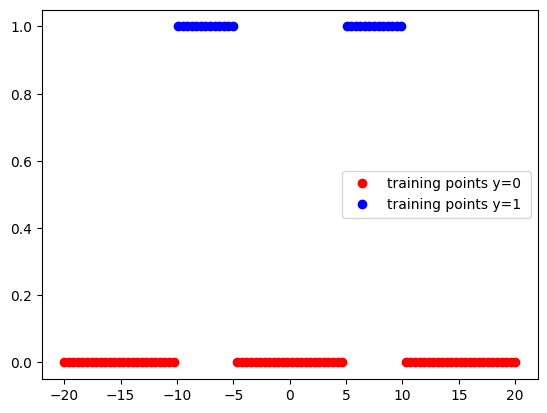

In [20]:
PlotStuff(data_set.x,data_set.y,leg=False)

### **What is an MLP (Multilayer Perceptron)?**

**MLP** stands for **Multilayer Perceptron** and is one of the most fundamental and important models in deep learning.

#### **Layer-by-Layer Structure**
An MLP is organized into sequential layers:

1.  **Input Layer:** Receives the input data (e.g., pixels of an image, numerical measurements).
2.  **Hidden Layer(s):** These are one or more "internal" layers that process the input. This is where the learning happens.
3.  **Output Layer:** Produces the final result (e.g., a number, a probability, a class label).

#### **How a Single Layer Works**
Each neuron in a layer performs two operations:
1.  **Linear Combination:** It multiplies the inputs by **weights** (`W`), sums them, and adds a **bias** (`b`).
    > `z = W * x + b`
2.  **Non-Linear Activation:** It applies a **non-linear activation function** (`f`) to the result. This step is crucial!
    > `a = f(z)`

Common activation functions are **ReLU**, **Sigmoid**, and **Tanh**.

#### **In Simple Terms**
An MLP is a **chain of transformations**. Each layer takes the output from the previous layer, "mixes" it with weights, and "warps" it with a non-linear function, creating increasingly complex and abstract representations of the data.

#### **Practical Example**
The model you implemented is a perfect example of a small MLP:

```
Input (e.g., 1 x-coordinate)  
  → Hidden Layer (e.g., 6 neurons with Sigmoid)  
  → Output Layer (1 neuron with Sigmoid)  
  → Result (Probability between 0 and 1)
```

Even though it's simple, this structure allows it to solve problems where a simple straight line (a linear model) is insufficient, such as **separating classes of data that are not arranged in a simple, linear pattern**.

---

## **Networks with Multi-Dimensional Input (2D)**
* Transitioning from 1D to 2D inputs increases the **weights** between the input and hidden layer.
* More neurons enable the network to learn **non-linear decision boundaries** for complex class separation.

**Geometric Intuition**
* A single line cannot separate the two classes.
* With **3 neurons**, the boundary becomes non-linear but remains imprecise.
* With **4 neurons**, correct separation is achieved.
* The function is also visualized as a **3D surface** of ŷ∈{0,1} above the (x1,x2) plane.

**PyTorch Workflow (Binary Classification, 2D)**
1. **Custom Dataset** (x∈ℝ², y∈{0,1}) + DataLoader
2. **MLP Model**: input_dim=2 → hidden_dim=4 → output_dim=1 with sigmoid
3. **Loss**: `BCELoss` (or `BCEWithLogitsLoss` without final sigmoid)
4. **Optimizer**: e.g., SGD/Adam
5. **Training Loop**: epoch loss accumulation, **accuracy** evaluation
   * Loss decreases → Accuracy increases

**Overfitting vs Underfitting**
* **Overfitting**: Excessively complex model (too many neurons) → jagged decision regions, noise fitting, poor generalization
* **Underfitting**: Oversimplified model (too few neurons) → rigid decision boundaries, fails to capture true patterns
* With **noise** in the dataset, some points inevitably fall on the "wrong side"; both overly complex and simple models exhibit characteristic errors.

**Choosing Model Complexity**
* Use a **validation set** to find the optimal number of neurons (early stopping, hyperparameter tuning)
* **More data** reduces variance
* **Regularization**: weight decay (L2), dropout, data augmentation (when appropriate)

**Key Message**
Increasing **input dimensions** and **neuron count** enhances MLP expressive power for non-linear boundaries. The challenge is **balancing** complexity to prevent over/underfitting through **validation** procedures and **regularization** when needed.

---

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [2]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [3]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [4]:
# Define the class Net with one hidden layer 

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        #output layer 
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = torch.sigmoid(self.linear2(x))
        return x

In [5]:
# Define the train model

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

In [6]:
# Define the class XOR_Data

class XOR_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()
        

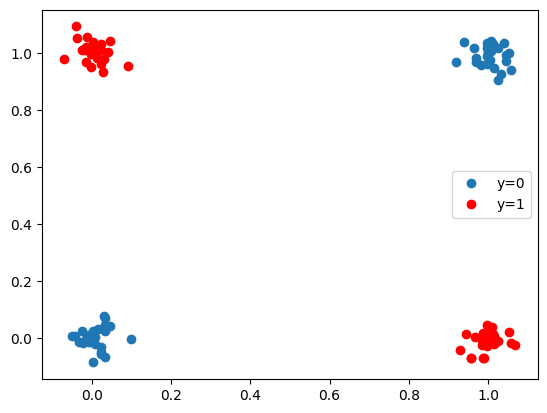

In [7]:
# Create dataset object

data_set = XOR_Data()
data_set.plot_stuff()

In [ ]:
# One Neuron
model = Net(2, 1, 1) # H is the number of neurons

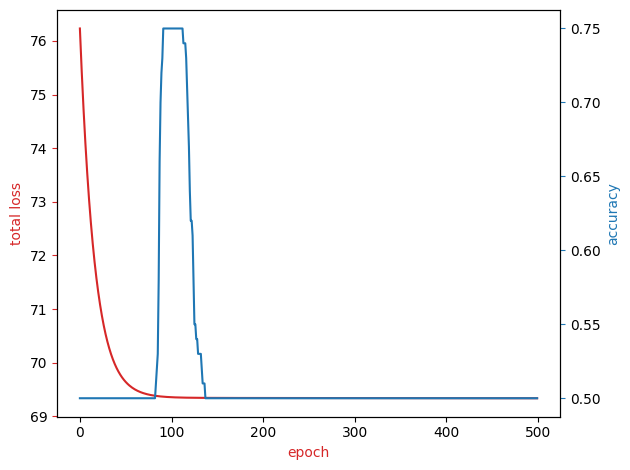

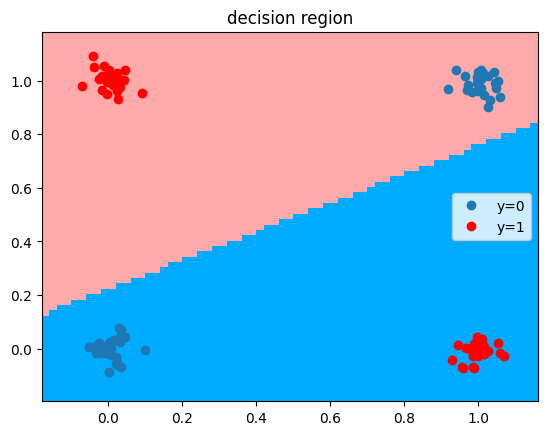

In [9]:
# Train the model

learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

In [10]:
# Two Neuron
model = Net(2, 2, 1) # H is the number of neurons

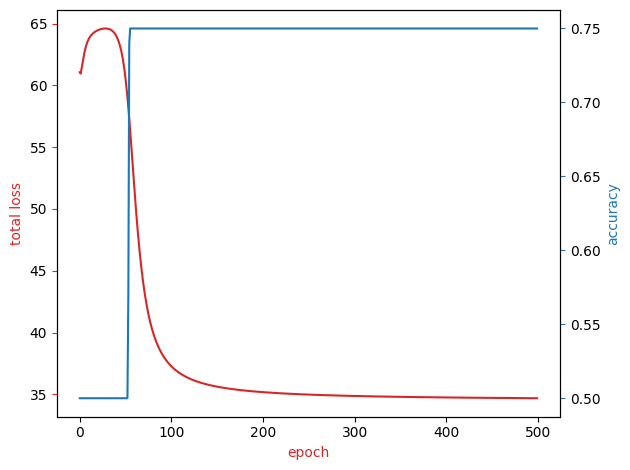

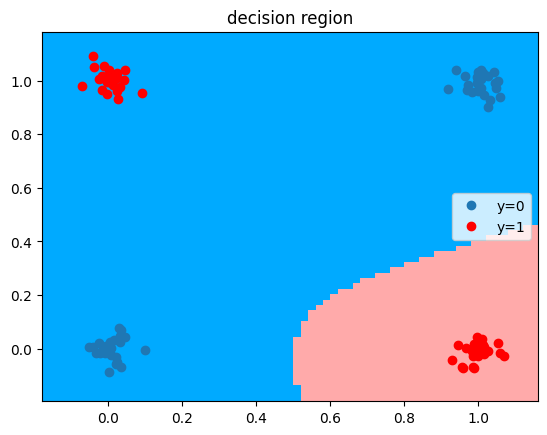

In [11]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

In [ ]:
# Three Neuron
model = Net(2, 3, 1) # H is the number of neurons

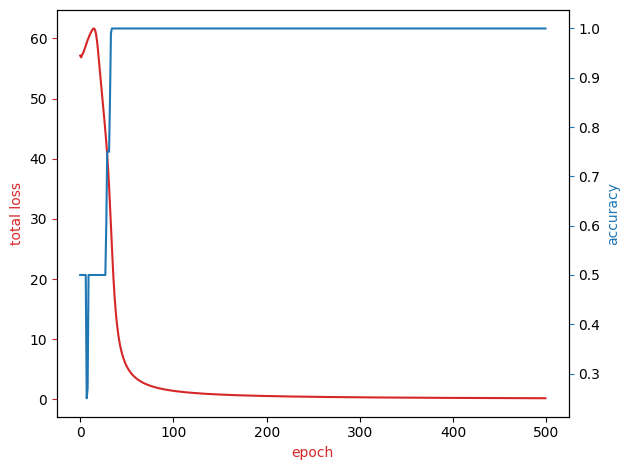

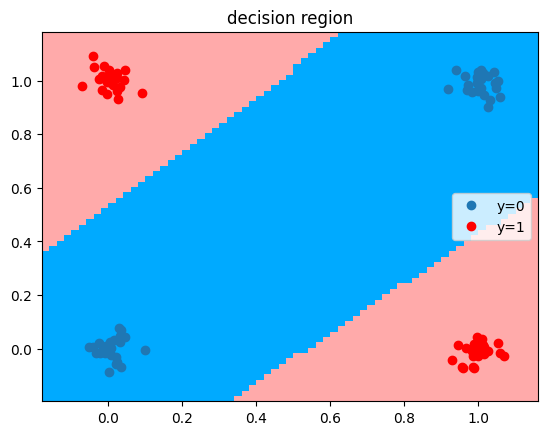

In [13]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

---

## **Multiclass Classification**

* Output Layer: One neuron per class
* Output Size: For C classes → output dimension = C
* Logits: Outputs are raw values before softmax
* Inference: Softmax + argmax (or directly argmax on logits)

**Model Architecture**

```
Input (d features) → Hidden Layer (h neurons) → Output (C neurons)
```

Components:
* Input: vector x ∈ R^d
* Hidden Layer: 1+ layers with activation (e.g., ReLU)
* Output: C neurons - No final activation
* Weights/Bias: Each output neuron has separate weights and bias

**PyTorch Implementation**

```python
# Model
model = nn.Sequential(
    nn.Linear(d, h),    # Input → Hidden
    nn.ReLU(),          # Activation
    nn.Linear(h, C)     # Hidden → Output (NO activation!)
)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()  # Combines LogSoftmax + NLL
optimizer = torch.optim.Adam(model.parameters())
```

Data Flow:
* MNIST: 28×28 images → flattened to 784 features
* Classes: 0-9 → C=10
* Prediction: pred = logits.argmax(dim=1)

**Training Loop**

* Monitoring:
  - Training loss per iteration
  - Validation accuracy per epoch
* Debug: Print misclassified samples for analysis

**Conceptual Notes**

* Softmax Regression Extension: Each class has its own decision boundary
* Binary Case: Can use 2 neurons + softmax OR 1 neuron + sigmoid
* Interpretation: Each logit represents the "score" for a class

**Deep Network Challenges**

* Computational Cost: More layers = more parameters
* Optimization Difficulties:
  - Vanishing/Exploding gradients
  - More sensitive hyperparameters
  - Unstable training

---

**Simple Neural Network for Multi-class:**

**Structure:**
```
Input → Hidden Layer → Output (one neuron per class)
```

**Key Points:**
- Use ReLU in hidden layers
- **No activation** in final layer
- Output layer: neurons = number of classes
- Use `CrossEntropyLoss` (handles softmax automatically)

**Code:**
```python
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)  # No activation
)
criterion = nn.CrossEntropyLoss()
```

---

In [14]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [15]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [16]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [17]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [18]:
# Define a Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [19]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [20]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:10<00:00, 916kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 245kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 684kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


In [21]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

In [22]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

In [23]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [24]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [25]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [26]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

---

## **Backpropagation & Vanishing Gradient**

**Core Concepts**
- **Backpropagation** uses the chain rule to efficiently compute gradients across layers by reusing common terms
- **Vanishing gradient** occurs in deep networks with sigmoid/tanh: gradients become products of many factors <1, approaching zero

**How Backpropagation Works**
- Output layer gradient: ∂L/∂a² × ∂a²/∂z² × ∂z²/∂w²
- Hidden layer gradient: Reuses terms from output layer via ∂z²/∂a¹ × ∂a¹/∂z¹
- **Computational efficiency**: Common terms calculated once and reused backward through layers

**Deep Networks**
- Same mechanism extends: store derivative "blocks" (layer errors) and recycle them backward layer by layer

**Vanishing Gradient Cause**
- Deep layer gradients are products of activation derivatives
- With **sigmoid/tanh**: |a'(z)| ≤ 0.25, so product over many layers ≈ 0
- **Result**: Weights far from output barely update

**Solutions**
- **Activations**: ReLU and variants (non-saturating derivatives)
- **Optimization**: Xavier/He initialization, Batch/LayerNorm
- **Architecture**: Skip/residual connections
- **Optimizers**: Adam, appropriate learning rate schedules

*Detailed implementations covered in subsequent sections.*

---

## **Neural Network Activation Functions**

**Common Activations & Derivatives**

* **Sigmoid**
  - Formula: σ(z) = 1/(1+e⁻ᶻ)
  - Derivative: σ'(z) = σ(z)(1-σ(z))
  - Range: [0,1] - not zero-centered
  - Issue: Gradient ≤ 0.25, causes vanishing gradients

* **Tanh**
  - Formula: tanh(z) = (eᶻ-e⁻ᶻ)/(eᶻ+e⁻ᶻ)
  - Derivative: tanh'(z) = 1-tanh²(z)
  - Range: [-1,1] - zero-centered, better than sigmoid
  - Issue: |tanh'(z)| < 1, still suffers vanishing gradients

* **ReLU**
  - Formula: ReLU(z) = max(0,z)
  - Derivative: 0 for z≤0, 1 for z>0
  - Advantage: No saturation for z>0, reduces vanishing gradients
  - Risk: Dead ReLU neurons with persistent negative inputs

**Training Impact**
- **Deep Networks**: ReLU typically achieves better loss/accuracy and faster convergence
- **Sigmoid**: Most susceptible to vanishing gradients (derivative ≤ 0.25)
- **Tanh**: Better than sigmoid but still faces gradient issues

**PyTorch Implementation**

Manual Model with `forward`:
```python
# Sigmoid Network
class NetSigmoid(nn.Module):
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return self.fc2(x)  # No final activation with CrossEntropyLoss

# Tanh Network  
class NetTanh(nn.Module):
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        return self.fc2(x)

# ReLU Network
class NetReLU(nn.Module):
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)
```

With `nn.Sequential`:
```python
NetTanh = nn.Sequential(
    nn.Linear(d_in, d_hid), nn.Tanh(), nn.Linear(d_hid, d_out)
)

NetReLU = nn.Sequential(
    nn.Linear(d_in, d_hid), nn.ReLU(), nn.Linear(d_hid, d_out)
)
```

**Key Takeaways**
- **ReLU**: Default choice for MLP/CNN - simple and effective against vanishing gradients
- **Tanh**: Useful for zero-centered hidden activations  
- **Sigmoid**: Use for binary output (with BCEWithLogitsLoss), avoid in deep hidden layers
- Combine with proper initialization (He/Xavier) and normalization techniques
- For multiclass: Use `CrossEntropyLoss` with raw logits (no final activation)

---